In [1]:
from copy import copy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from scipy import stats
%matplotlib inline

### 1. Load in the summarized subject data

In [34]:
df = pd.read_pickle('gpData_v1.pkl')
NrSbj = len(df.sbjId.unique())
print('A total of ' + str(NrSbj) + ' subjects')

A total of 9 subjects


### 2. Look at Task-switching data:

Overall accuracy for the task-switching control task was 74.37%
Overall RT (correct trials) for the task-switching control task was 722.03ms


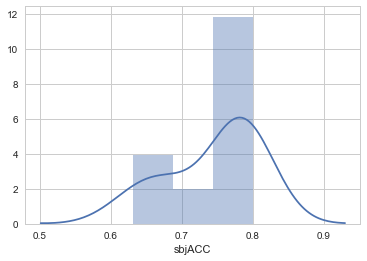

In [71]:
df_tskSw = df.loc[df.phase=='TaskSw',:]
sbj_tsACC = df_tskSw.groupby('sbjId').sbjACC.mean()
#print(sbj_tsACC)  # might need to exclude low accuracy subjects later on - lower than 70% or 65%
sns.distplot(sbj_tsACC)
TS_meanACC = df_tskSw.groupby('sbjId').sbjACC.mean().mean()*100
TS_meanRT = df_tskSw.loc[df_tskSw.sbjACC==1,:].groupby('sbjId').sbjRT.mean().mean()
print('Overall accuracy for the task-switching control task was ' + '{:.2f}'.format(TS_meanACC) + '%')
print('Overall RT (correct trials) for the task-switching control task was ' + '{:.2f}'.format(TS_meanRT) + 'ms')

#### 2a. Task-switching ACC as a function of 2 (respComp: RC, RIC ) x 2 (Trial Type: switch/repeat) 

respComp  trialType
RC        switch       80.000000
          repeat       89.444444
RIC       switch       52.222222
          repeat       75.833333
Name: sbjACC, dtype: float64


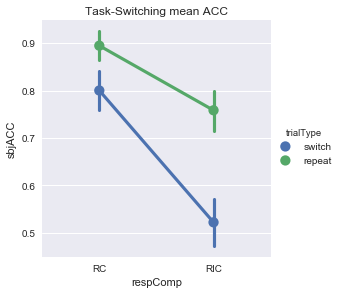

In [45]:
sns.factorplot(x='respComp',y='sbjACC', data=df_tskSw, hue='trialType')
plt.title("Task-Switching mean ACC")
condMACC = df_tskSw.groupby(['sbjId','respComp','trialType']).sbjACC.mean()
gpResult_ts_acc  = condMACC.groupby(['respComp','trialType']).mean()*100
print(gpResult_ts_acc)

#### 2b. Task-switching RT as a function of 2 (respComp: RC, RIC ) x 2 (Trial Type: switch/repeat) 

respComp  trialType
RC        switch       717.729507
          repeat       689.628266
RIC       switch       787.823054
          repeat       720.024091
Name: sbjRT, dtype: float64


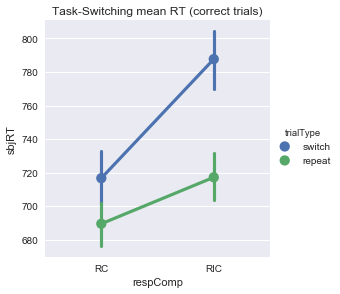

In [46]:
sns.factorplot(x='respComp',y='sbjRT', data=df_tskSw.loc[df_tskSw.sbjACC==1,:], hue='trialType')
plt.title("Task-Switching mean RT (correct trials)")
condMRT = df_tskSw.loc[df_tskSw.sbjACC==1,:].groupby(['sbjId','respComp','trialType']).sbjRT.mean()
gpResult_ts_rt = condMRT.groupby(['respComp','trialType']).mean()
print(gpResult_ts_rt)

### 3. Look at Subsequent Memory Data

Overall accuracy for the subsequent memory task was 72.64%
Overall RT (all trials) for the subsequent memory task was 916.55ms
False Alarm Rate was 20.14%


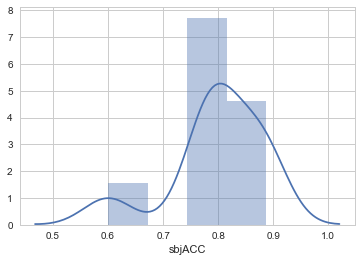

In [69]:
df_mem = df.loc[df.phase=='Mem',:]
mem_meanACC = df_mem.groupby('sbjId').sbjACC.mean().mean()*100
mem_meanRT = df_mem.groupby('sbjId').sbjRT.mean().mean()
print('Overall accuracy for the subsequent memory task was ' + '{:.2f}'.format(mem_meanACC) + '%')
print('Overall RT (all trials) for the subsequent memory task was ' + '{:.2f}'.format(mem_meanRT) + 'ms')
sbj_CRrate = df_mem.loc[df_mem.memCond=='new',:].groupby('sbjId').sbjACC.mean()
# print(sbj_CRrate)  # if a subject's correct rejection rate is too low, might need to exclude this subject later on
sns.distplot(sbj_CRrate)
CRrate = df_mem.loc[df_mem.memCond=='new',:].groupby('sbjId').sbjACC.mean().mean()*100
print('False Alarm Rate was ' + '{:.2f}'.format(100-CRrate) + '%')

#### 3a. Subsequent memory (Hit rate) as a function of  2 (respComp: RC, RIC ) x 2 (Trial Type: switch/repeat) 

respComp  trialType
RC        switch       69.166667
          repeat       70.277778
RIC       switch       65.277778
          repeat       71.388889
Name: sbjACC, dtype: float64


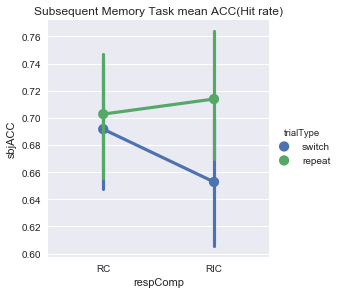

In [53]:
sns.factorplot(x='respComp',y='sbjACC', data=df_mem.loc[df_mem.memCond!='new',:], hue='trialType')
plt.title("Subsequent Memory Task mean ACC(Hit rate)")
condMACC_mem = df_mem.loc[df_mem.memCond!=5].groupby(['sbjId','respComp','trialType']).sbjACC.mean()
gpResult_mem_acc = condMACC_mem.groupby(['respComp','trialType']).mean()*100
print(gpResult_mem_acc)

#### (3b. Subsequent memory (RT) as a function of  memCond)

memCond
old-switch-RIC    901.580556
old-switch-RC     912.930057
old-repeat-RIC    905.375427
old-repeat-RC     909.278419
new               935.124570
Name: sbjRT, dtype: float64


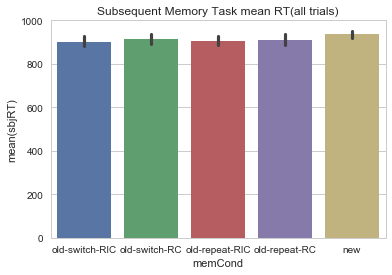

In [65]:
sns.barplot(x='memCond',y='sbjRT', data=df_mem)
plt.title("Subsequent Memory Task mean RT(all trials)")
condMRT_mem = df_mem.groupby(['sbjId','memCond']).sbjRT.mean()
gpResult_mem_rt = condMRT_mem.groupby(['memCond']).mean()
print(gpResult_mem_rt)